# Imports

In [1]:
from bovw_cam.feature_extractor import FeatureExtractor
from bovw_cam.bovw import BoVW
from bovw_cam.bovw_cam import BoVWCAM
from bovw_cam.classifier_interface import ClassifierInterface

from sklearn import svm
from matplotlib import pyplot as plt

import cv2

# Feature extraction with SIFT

In [2]:
feature_extractor = FeatureExtractor()

train, test = feature_extractor.create_train_test_split('/home/arnaldo/Pictures/toy_classification_dataset/train',
                                                        '/home/arnaldo/Pictures/toy_classification_dataset/test')

dictionary = feature_extractor.create_dictionary_split('/home/arnaldo/Pictures/toy_classification_dataset/dict', 0.9)

In [3]:
train

,image_path,keypoint_coord_x,keypoint_coord_y,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,target
0,/home/arnaldo/Pictures/toy_classification_data...,2,854,1.0,0.0,0.0,35.0,122.0,26.0,7.0,...,44.0,27.0,0.0,0.0,3.0,3.0,1.0,7.0,118.0,class_1
2,/home/arnaldo/Pictures/toy_classification_data...,3,719,3.0,23.0,137.0,86.0,6.0,2.0,0.0,...,58.0,0.0,0.0,0.0,12.0,65.0,13.0,8.0,1.0,class_1
3,/home/arnaldo/Pictures/toy_classification_data...,3,696,12.0,15.0,7.0,65.0,58.0,21.0,10.0,...,29.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,class_1
4,/home/arnaldo/Pictures/toy_classification_data...,3,802,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,30.0,83.0,73.0,29.0,12.0,1.0,3.0,6.0,class_1
5,/home/arnaldo/Pictures/toy_classification_data...,3,776,1.0,0.0,14.0,135.0,56.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828,/home/arnaldo/Pictures/toy_classification_data...,1155,137,0.0,0.0,0.0,0.0,0.0,8.0,10.0,...,5.0,19.0,67.0,25.0,44.0,63.0,13.0,1.0,2.0,class_2
9829,/home/arnaldo/Pictures/toy_classification_data...,1155,331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,4.0,3.0,13.0,45.0,73.0,24.0,11.0,7.0,class_2
9831,/home/arnaldo/Pictures/toy_classification_data...,1155,163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,13.0,108.0,29.0,1.0,1.0,6.0,class_2
9832,/home/arnaldo/Pictures/toy_classification_data...,1156,455,0.0,0.0,5.0,36.0,24.0,12.0,4.0,...,18.0,83.0,124.0,1.0,0.0,0.0,24.0,11.0,6.0,class_2


# Bag-of-Visual-Words

In [4]:
bovw = BoVW(dictionary, 256, 32)

dict_histograms, dict_metadata = bovw.get_feature_vectors(dictionary)
train_histograms, train_metadata = bovw.get_feature_vectors(train)
test_histograms, test_metadata = bovw.get_feature_vectors(test)

/home/arnaldo/bovw-cam/.venv/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [5]:
train_histograms

,image_path,target,histogram_1,histogram_2,histogram_3,histogram_4,histogram_5,histogram_6,histogram_7,histogram_8,...,histogram_247,histogram_248,histogram_249,histogram_250,histogram_251,histogram_252,histogram_253,histogram_254,histogram_255,histogram_256
0,/home/arnaldo/Pictures/toy_classification_data...,class_1,26,16,0,18,3,15,11,20,...,17,12,11,18,40,18,10,0,8,16
1,/home/arnaldo/Pictures/toy_classification_data...,class_1,26,16,0,18,3,15,11,20,...,17,12,11,18,40,18,10,0,8,16
2,/home/arnaldo/Pictures/toy_classification_data...,class_1,26,16,0,18,3,15,11,20,...,17,12,11,18,40,18,10,0,8,16
3,/home/arnaldo/Pictures/toy_classification_data...,class_1,26,16,0,18,3,15,11,20,...,17,12,11,18,40,18,10,0,8,16
4,/home/arnaldo/Pictures/toy_classification_data...,class_1,26,16,0,18,3,15,11,20,...,17,12,11,18,40,18,10,0,8,16
5,/home/arnaldo/Pictures/toy_classification_data...,class_1,26,16,0,18,3,15,11,20,...,17,12,11,18,40,18,10,0,8,16
6,/home/arnaldo/Pictures/toy_classification_data...,class_1,26,16,0,18,3,15,11,20,...,17,12,11,18,40,18,10,0,8,16
7,/home/arnaldo/Pictures/toy_classification_data...,class_1,26,16,0,18,3,15,11,20,...,17,12,11,18,40,18,10,0,8,16
8,/home/arnaldo/Pictures/toy_classification_data...,class_1,26,16,0,18,3,15,11,20,...,17,12,11,18,40,18,10,0,8,16
9,/home/arnaldo/Pictures/toy_classification_data...,class_1,26,16,0,18,3,15,11,20,...,17,12,11,18,40,18,10,0,8,16


In [6]:
train_metadata

,image_path,keypoint_coord_x,keypoint_coord_y,cluster_idx
0,/home/arnaldo/Pictures/toy_classification_data...,3,53,136
1,/home/arnaldo/Pictures/toy_classification_data...,4,663,73
2,/home/arnaldo/Pictures/toy_classification_data...,4,182,18
3,/home/arnaldo/Pictures/toy_classification_data...,4,542,153
4,/home/arnaldo/Pictures/toy_classification_data...,5,271,167
...,...,...,...,...
159633,/home/arnaldo/Pictures/toy_classification_data...,1155,137,31
159634,/home/arnaldo/Pictures/toy_classification_data...,1155,331,140
159635,/home/arnaldo/Pictures/toy_classification_data...,1155,163,16
159636,/home/arnaldo/Pictures/toy_classification_data...,1156,455,147


# Train SVM

In [7]:
svm = svm.SVC()

X_train = train_histograms.drop(['image_path', 'target'], axis=1)
y_train = train_histograms['target']

svm.fit(X_train, y_train)

SVC()

# Classification interface implementation

In [8]:
from typing import Any


class MyClassifier(ClassifierInterface):
    def __init__(self, model) -> None:
        super().__init__(model)
        self.map_class = {'class_1': 0, 'class_2': 1}

    def predict(self, input_sample: Any) -> int:
        predicted_class = self.model.predict(input_sample)
        return self.map_class[predicted_class[0]]
    
my_classfier = MyClassifier(svm)

# Bag-of-Visual-Words-Class-Activation-Map

/home/arnaldo/bovw-cam/.venv/lib64/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


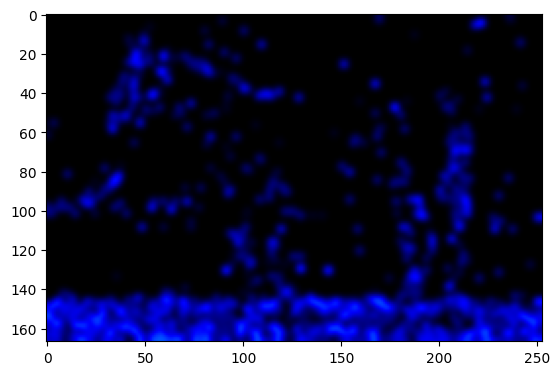

In [9]:
MAX_POOLING_PARAMS = {'kernel_size': 32, 'stride': 8}

bovw_cam = BoVWCAM(my_classfier, dict_histograms)

cam = bovw_cam.get_class_activation_map('/home/arnaldo/Pictures/toy_classification_dataset/test/class_2/1584679085.ac7be78536.jpg', 
                                        test_histograms, 
                                        test_metadata, 
                                        MAX_POOLING_PARAMS)

cam_with_color = cv2.applyColorMap(cam, cv2.COLORMAP_HOT)

plt.imshow(cam_with_color)